In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
air=pd.read_excel("Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)  #parse_dates converts date in string format to datetime object

In [3]:
air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


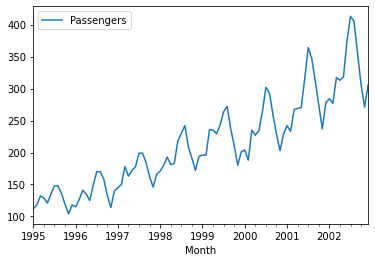

In [4]:
air.plot()
pyplot.show()

Histogram and Density plots

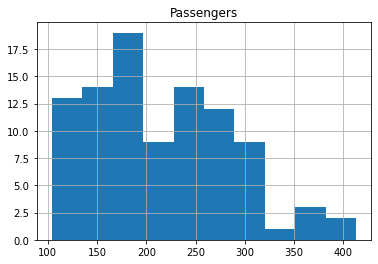

In [5]:
air.hist()
pyplot.show()

Lag plots

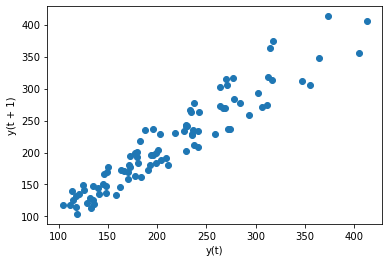

In [6]:
from pandas.plotting import lag_plot
lag_plot(air)
pyplot.show()

Sampling

In [7]:
upsampled=air.resample('D').mean()
print(upsampled.head())

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN


Interpolating the missing values

In [8]:
interpolated=upsampled.interpolate(method="linear")
print(interpolated.head())

            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194


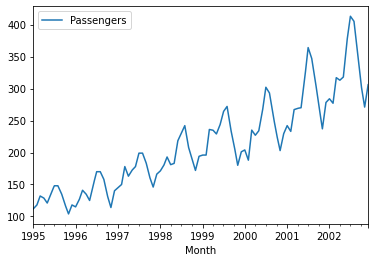

In [9]:
interpolated.plot()
pyplot.show()

Data driven models

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

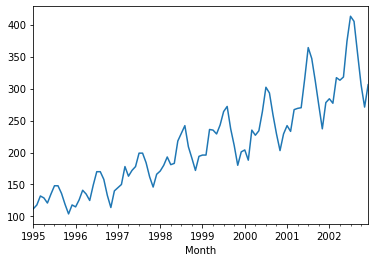

In [11]:
air.Passengers.plot()

Splitting Data

In [12]:
train=air.head(80)
test=air.tail(16)

Moving average method

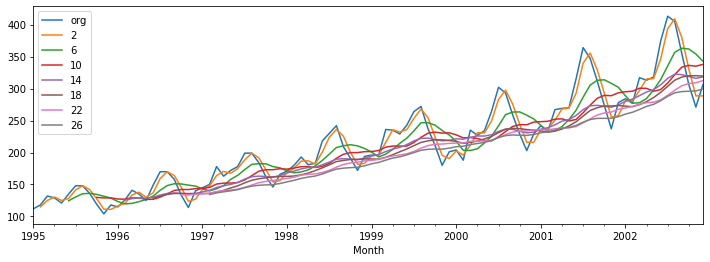

In [13]:
plt.figure(figsize=(12,4))
air.Passengers.plot(label="org")
for i in range(2,30,4):
    air['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time series decomposition

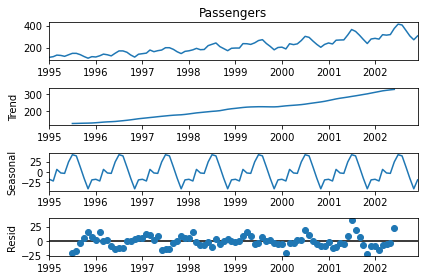

In [14]:
decompose_ts_add=seasonal_decompose(air.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

ACF & PACF plots

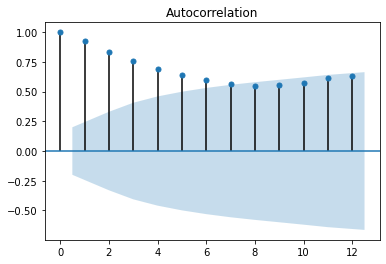

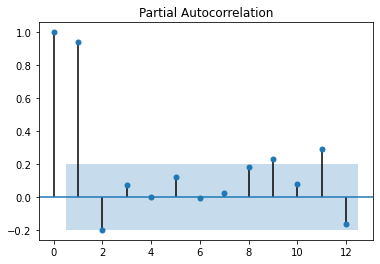

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air.Passengers,lags=12)
tsa_plots.plot_pacf(air.Passengers,lags=12)
plt.show()

Evaluation metric MAPE

In [16]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple exponential Method

In [17]:
ses_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Passengers)


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


11.375850554268087

Holt's method

In [18]:
hw_model=Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Passengers)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


51.9344398436328

Holts winter exponential smoothing with additive seasonality and additive trend

In [19]:
hwe_model_add=ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_model_add=hwe_model_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_model_add,test.Passengers)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


2.4682346670914943

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [20]:
hwe_model_mul_add=ExponentialSmoothing(train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_model_mul_add=hwe_model_mul_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_model_mul_add,test.Passengers)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


3.2250634332744905

Final model by combining train and test

In [21]:
hwe_model_add=ExponentialSmoothing(air['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [22]:
hwe_model_add.forecast(15)

2003-01-01    320.924021
2003-02-01    313.638039
2003-03-01    352.925020
2003-04-01    350.350301
2003-05-01    356.060922
2003-06-01    408.899129
2003-07-01    446.143114
2003-08-01    433.358026
2003-09-01    382.762459
2003-10-01    336.170254
2003-11-01    303.315050
2003-12-01    349.662472
2004-01-01    356.109876
2004-02-01    348.823895
2004-03-01    388.110875
Freq: MS, dtype: float64

Model based approach

In [23]:
air=pd.read_excel("Airlines+Data.xlsx")
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import numpy as np
p= air["Month"][0]
air['months']=0
for i in range(96):
    p = air["Month"][i]
    air['months'][i]
month_dummies = pd.DataFrame(pd.get_dummies(air['months']))
air1 = pd.concat([air,month_dummies],axis = 1)

air1["t"] = np.arange(1,97)

air1["t_squared"] = air1["t"]*air1["t"]
air1.columns
air1["log_Rider"] = np.log(air1["Passengers"])
air1.rename(columns={"Passengers": 'passengers'}, inplace=True)

In [24]:
air1

,Month,passengers,months,0,t,t_squared,log_Rider
0,1995-01-01,112,0,1,1,1,4.718499
1,1995-02-01,118,0,1,2,4,4.770685
2,1995-03-01,132,0,1,3,9,4.882802
3,1995-04-01,129,0,1,4,16,4.859812
4,1995-05-01,121,0,1,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,0,1,92,8464,6.003887
92,2002-09-01,355,0,1,93,8649,5.872118
93,2002-10-01,306,0,1,94,8836,5.723585
94,2002-11-01,271,0,1,95,9025,5.602119


In [25]:
air1["Date"]=pd.to_datetime(air1.Month,format="%b-%y") 
#extracting date,month,year from the date column using date functions from pandas

air1["month"]=air1.Date.dt.strftime("%b") #month extraction
air1["year"]=air1.Date.dt.strftime("%y") #year extraction

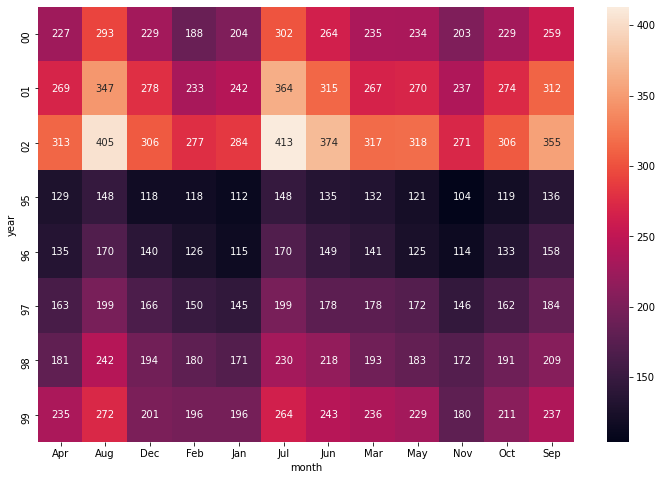

In [26]:
plt.figure(figsize=(12,8))
heatmap_y_month=pd.pivot_table(data=air1,values="passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

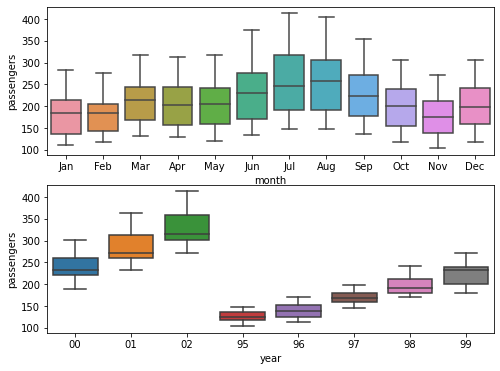

In [27]:
plt.figure(figsize=(8,6))#Box plot
plt.subplot(211)
sns.boxplot(x="month",y="passengers",data=air1)
plt.subplot(212)
sns.boxplot(x="year",y="passengers",data=air1)

Splitting data

In [28]:
train=air1.head(80)
test=air1.tail(16)

In [29]:
#linear model
import statsmodels.formula.api as smf

linear_model=smf.ols('passengers~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_linear))**2))
rmse_linear


47.54262406772677

In [30]:
#exponential

exp=smf.ols('log_Rider~t',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_exp))**2))
rmse_exp

312.8892354482463

In [31]:
#Quadratic

Quad=smf.ols('passengers~t+t_squared',data=train).fit()
pred_Quad=pd.Series(Quad.predict(test[['t','t_squared']]))
rmse_Quad=np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584248

In [32]:
#additive seasonality

add_sea=smf.ols('passengers~month',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(pd.DataFrame(test['month'])))
rmse_add_sea=np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea


129.2664764144331

In [33]:
#additive seasonality quadratic

add_sea_quad=smf.ols("passengers~t+t_squared+month",data=train).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(test[['t','t_squared','month']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570077633

In [34]:
#multiplicative seasonality

mul_sea=smf.ols("log_Rider~month",data=train).fit()
pred_mul_sea=pd.Series(mul_sea.predict(test[['log_Rider','month']]))
rmse_mul_sea=np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_mul_sea))**2))
rmse_mul_sea

313.4395602128289

In [35]:
#multiplicative additive seasonality

mul_add_sea=smf.ols("log_Rider~t+month",data=train).fit()
pred_mul_add_sea=pd.Series(mul_add_sea.predict(test[['log_Rider','t','month']]))
rmse_mul_add_sea=np.sqrt(np.mean((np.array(test['passengers'])-np.array(pred_mul_add_sea))**2))
rmse_mul_add_sea

312.90871517511727

In [36]:
#compare the results

data={"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_mul_sea","rmse_mul_add_sea"]),"RMSE_values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_values'])

,MODEL,RMSE_values
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
1,rmse_exp,312.889235
6,rmse_mul_add_sea,312.908715
5,rmse_mul_sea,313.439560


Predicting for new time period

In [37]:
predict_data=pd.read_csv("Predict_new (2).csv")
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_squared
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [38]:
#Building model on above entire dataset

model_full=smf.ols("passengers~t+t_squared+month",data=air1).fit()

In [39]:
air1

,Month,passengers,months,0,t,t_squared,log_Rider,Date,month,year
0,1995-01-01,112,0,1,1,1,4.718499,1995-01-01,Jan,95
1,1995-02-01,118,0,1,2,4,4.770685,1995-02-01,Feb,95
2,1995-03-01,132,0,1,3,9,4.882802,1995-03-01,Mar,95
3,1995-04-01,129,0,1,4,16,4.859812,1995-04-01,Apr,95
4,1995-05-01,121,0,1,5,25,4.795791,1995-05-01,May,95
...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,1,92,8464,6.003887,2002-08-01,Aug,02
92,2002-09-01,355,0,1,93,8649,5.872118,2002-09-01,Sep,02
93,2002-10-01,306,0,1,94,8836,5.723585,2002-10-01,Oct,02
94,2002-11-01,271,0,1,95,9025,5.602119,2002-11-01,Nov,02


In [40]:
pred_new=pd.Series(add_sea_quad.predict(predict_data))
pred_new

0     534.422200
1     537.142654
2     566.291680
3     562.012134
4     563.161160
5     589.024471
6     615.887783
7     616.893951
8     591.280147
9     570.234352
10    551.188556
11    574.642761
dtype: float64